In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [109]:
phys_supp_17 = pd.read_csv("/Users/adamtsuchiyama/Documents/healthcare-bluebook-red-team/data/Medicare_Provider_Util_Payment_PUF_CY2017.txt", sep='\t', usecols=['npi', 'nppes_provider_last_org_name', 'nppes_entity_code', 'nppes_provider_zip', 'nppes_provider_state', 'provider_type', 'place_of_service', 'hcpcs_code', 'bene_day_srvc_cnt', 'average_Medicare_allowed_amt'], dtype={'npi': str, 'nppes_provider_last_org_name' : str, 'nppes_entity_code' : str, 'nppes_provider_zip' : str, 'nppes_provider_state' : str, 'provider_type' : str, 'place_of_service' : str, 'hcpcs_code' : str, 'bene_day_srvc_cnt' : float, 'average_Medicare_allowed_amt' : float})



In [110]:
phys_supp_16 = pd.read_csv("/Users/adamtsuchiyama/Documents/healthcare-bluebook-red-team/data/Medicare_Provider_Util_Payment_PUF_CY2016.txt", sep='\t', usecols=['NPI', 'PLACE_OF_SERVICE', 'HCPCS_CODE', 'BENE_DAY_SRVC_CNT', 'AVERAGE_MEDICARE_ALLOWED_AMT'], dtype={'NPI': str, 'PLACE_OF_SERVICE' : str, 'HCPCS_CODE' : str, 'BENE_DAY_SRVC_CNT' : float, 'AVERAGE_MEDICARE_ALLOWED_AMT' : float})



In [111]:
phys_supp_15 = pd.read_csv("/Users/adamtsuchiyama/Documents/healthcare-bluebook-red-team/data/Medicare_Provider_Util_Payment_PUF_CY2015.txt", sep='\t', usecols=['npi', 'place_of_service', 'hcpcs_code', 'bene_day_srvc_cnt', 'average_Medicare_allowed_amt'], dtype={'npi': str, 'place_of_service' : str, 'hcpcs_code' : str, 'bene_day_srvc_cnt' : float, 'average_Medicare_allowed_amt' : float})



In [112]:
phys_supp_17.columns = map(str.lower, phys_supp_17.columns)
phys_supp_16.columns = map(str.lower, phys_supp_16.columns)
phys_supp_15.columns = map(str.lower, phys_supp_15.columns)

In [113]:
phys_supp_17 = phys_supp_17.rename(columns={'bene_day_srvc_cnt' : 'srvc_cnt_17', 'average_medicare_allowed_amt' : 'avg_med_amt_17'})
phys_supp_16 = phys_supp_16.rename(columns={'bene_day_srvc_cnt' : 'srvc_cnt_16', 'average_medicare_allowed_amt' : 'avg_med_amt_16'})
phys_supp_15 = phys_supp_15.rename(columns={'bene_day_srvc_cnt' : 'srvc_cnt_15', 'average_medicare_allowed_amt' : 'avg_med_amt_15'})
print(phys_supp_17.info())
print(phys_supp_16.info())
print(phys_supp_15.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9847444 entries, 0 to 9847443
Data columns (total 10 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   npi                           object 
 1   nppes_provider_last_org_name  object 
 2   nppes_entity_code             object 
 3   nppes_provider_zip            object 
 4   nppes_provider_state          object 
 5   provider_type                 object 
 6   place_of_service              object 
 7   hcpcs_code                    object 
 8   srvc_cnt_17                   float64
 9   avg_med_amt_17                float64
dtypes: float64(2), object(8)
memory usage: 751.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9714897 entries, 0 to 9714896
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   npi               object 
 1   place_of_service  object 
 2   hcpcs_code        object 
 3   srvc_cnt_16       float64
 4   avg_med_a

In [114]:
phys_join = pd.merge(phys_supp_17, phys_supp_16, how='inner', on=['npi', 'place_of_service' ,'hcpcs_code'])
print(phys_join.head())

          npi                       nppes_provider_last_org_name  \
0  0000000001  CPT copyright 2016 American Medical Associatio...   
1  1003000126                                          ENKESHAFI   
2  1003000126                                          ENKESHAFI   
3  1003000126                                          ENKESHAFI   
4  1003000126                                          ENKESHAFI   

  nppes_entity_code nppes_provider_zip nppes_provider_state  \
0               NaN                NaN                  NaN   
1                 I          215021854                   MD   
2                 I          215021854                   MD   
3                 I          215021854                   MD   
4                 I          215021854                   MD   

       provider_type place_of_service hcpcs_code  srvc_cnt_17  avg_med_amt_17  \
0                NaN              NaN        NaN          NaN             NaN   
1  Internal Medicine                F      99217  

In [115]:
phys_join = pd.merge(phys_join, phys_supp_15, how='inner', on=['npi', 'place_of_service' ,'hcpcs_code'])
print(phys_join.head())

          npi                       nppes_provider_last_org_name  \
0  0000000001  CPT copyright 2016 American Medical Associatio...   
1  1003000126                                          ENKESHAFI   
2  1003000126                                          ENKESHAFI   
3  1003000126                                          ENKESHAFI   
4  1003000126                                          ENKESHAFI   

  nppes_entity_code nppes_provider_zip nppes_provider_state  \
0               NaN                NaN                  NaN   
1                 I          215021854                   MD   
2                 I          215021854                   MD   
3                 I          215021854                   MD   
4                 I          215021854                   MD   

       provider_type place_of_service hcpcs_code  srvc_cnt_17  avg_med_amt_17  \
0                NaN              NaN        NaN          NaN             NaN   
1  Internal Medicine                F      99217  

In [116]:
phys_join_med = phys_join.drop(columns={'nppes_provider_last_org_name', 'nppes_provider_zip', 'nppes_provider_state', 'provider_type', 'srvc_cnt_17', 'srvc_cnt_16', 'srvc_cnt_15'})
print(phys_join_med.info())
print(np.shape(phys_join_med))



<class 'pandas.core.frame.DataFrame'>
Int64Index: 6129537 entries, 0 to 6129536
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   npi                object 
 1   nppes_entity_code  object 
 2   place_of_service   object 
 3   hcpcs_code         object 
 4   avg_med_amt_17     float64
 5   avg_med_amt_16     float64
 6   avg_med_amt_15     float64
dtypes: float64(3), object(4)
memory usage: 374.1+ MB
None
(6129537, 7)


In [117]:
phys_med_indv_O = phys_join_med[phys_join_med['nppes_entity_code'] == 'I']
print(np.shape(phys_med_indv_O))

(5827702, 7)


In [118]:
phys_med_indv_F = phys_med_indv_O[phys_med_indv_O['place_of_service'] == 'F']
print(np.shape(phys_med_indv_F))

(2304717, 7)


In [119]:
phys_med_indv_O = phys_med_indv_O[phys_med_indv_O['place_of_service'] == 'O']
print(np.shape(phys_med_indv_O))

(3522985, 7)


In [120]:
phys_med_org_O = phys_join_med[phys_join_med['nppes_entity_code'] == 'O']
print(np.shape(phys_med_org_O))

(301834, 7)


In [121]:
phys_med_org_F = phys_med_org_O[phys_med_org_O['place_of_service'] == 'F']
print(np.shape(phys_med_org_F))

(70079, 7)


In [122]:
phys_med_org_O = phys_med_org_O[phys_med_org_O['place_of_service'] == 'O']
print(np.shape(phys_med_org_O))

(231755, 7)


In [123]:
phys_med_io_group = phys_med_indv_O.groupby('hcpcs_code').mean()
phys_med_io_group = phys_med_io_group.reset_index()
print(phys_med_io_group)

     hcpcs_code  avg_med_amt_17  avg_med_amt_16  avg_med_amt_15
0         00103      242.459405      225.736845      263.455662
1         00142       82.209689       83.102839       84.455969
2         00160      213.750445      215.261039      216.226974
3         00170      131.820746      126.353729      137.007402
4         00300      140.812400      143.992940      149.927379
...         ...             ...             ...             ...
3163      Q9967        0.123475        0.124704        0.152243
3164      Q9969        9.680905        9.723776       12.315193
3165      R0070      222.432805      220.546799      219.447497
3166      R0075       87.831579       91.664589       85.652551
3167      V2632      113.830000      113.040000      113.490000

[3168 rows x 4 columns]


In [124]:
phys_med_io_group['16/17_med_chng'] = abs(phys_med_io_group['avg_med_amt_17'] - phys_med_io_group['avg_med_amt_16'])
phys_med_io_group['15/16_med_chng'] = abs(phys_med_io_group['avg_med_amt_16'] - phys_med_io_group['avg_med_amt_15'])
phys_med_io_group['15/17_med_chng'] = abs(phys_med_io_group['avg_med_amt_17'] - phys_med_io_group['avg_med_amt_15'])

In [125]:
phys_med_io_1617 = phys_med_io_group.sort_values(by=['16/17_med_chng'], ascending=False).head()
phys_med_io_1617 = phys_med_io_1617.drop(columns={'avg_med_amt_15', '15/16_med_chng', '15/17_med_chng'})
print(phys_med_io_1617)

     hcpcs_code  avg_med_amt_17  avg_med_amt_16  16/17_med_chng
3035      J7192    17895.679067      324.885624    17570.793443
3120      Q2043    39255.403622    37640.843298     1614.560324
786       58558     1353.123597      426.708313      926.415284
517       36224     2304.418230     1635.140750      669.277479
687       49440      358.032500      910.310000      552.277500


In [126]:
phys_med_io_1516 = phys_med_io_group.sort_values(by=['15/16_med_chng'], ascending=False).head()
phys_med_io_1516 = phys_med_io_1516.drop(columns={'avg_med_amt_17', '16/17_med_chng', '15/17_med_chng'})
print(phys_med_io_1516)

     hcpcs_code  avg_med_amt_16  avg_med_amt_15  15/16_med_chng
3035      J7192      324.885624    33345.018081    33020.132458
609       41530      943.177983     3105.401348     2162.223365
2861      J0600     2069.828654      259.039306     1810.789348
3120      Q2043    37640.843298    35877.310500     1763.532799
3092      J9999     1439.377377      465.466032      973.911345


In [127]:
phys_med_io_1517 = phys_med_io_group.sort_values(by=['15/17_med_chng'], ascending=False).head()
phys_med_io_1517 = phys_med_io_1517.drop(columns={'avg_med_amt_16', '15/16_med_chng', '16/17_med_chng'})
print(phys_med_io_1517)

     hcpcs_code  avg_med_amt_17  avg_med_amt_15  15/17_med_chng
3035      J7192    17895.679067    33345.018081    15449.339014
3120      Q2043    39255.403622    35877.310500     3378.093122
609       41530      946.850260     3105.401348     2158.551088
2861      J0600     2307.010626      259.039306     2047.971320
3092      J9999     1746.413318      465.466032     1280.947286


In [128]:
phys_med_if_group = phys_med_indv_F.groupby('hcpcs_code').mean()
phys_med_if_group = phys_med_if_group.reset_index()
print(phys_med_if_group)

     hcpcs_code  avg_med_amt_17  avg_med_amt_16  avg_med_amt_15
0         00103      153.987151      151.402464      156.469230
1         00104       81.402022       81.109388       83.049154
2         00120      185.990211      187.184187      197.825921
3         00126       77.143073       77.420606       81.089396
4         00140      140.419330      140.199532      147.596819
...         ...             ...             ...             ...
3065      Q4110       66.587918       39.104372       37.115946
3066      Q9962        0.209927        0.200000        0.200000
3067      Q9965        0.832785        0.854934        0.986658
3068      Q9967        0.125239        0.124301        0.152614
3069      R0070      211.460000      209.370000      206.069041

[3070 rows x 4 columns]


In [129]:
phys_med_if_group['16/17_med_chng'] = abs(phys_med_if_group['avg_med_amt_17'] - phys_med_if_group['avg_med_amt_16'])
phys_med_if_group['15/16_med_chng'] = abs(phys_med_if_group['avg_med_amt_16'] - phys_med_if_group['avg_med_amt_15'])
phys_med_if_group['15/17_med_chng'] = abs(phys_med_if_group['avg_med_amt_17'] - phys_med_if_group['avg_med_amt_15'])

In [130]:
phys_med_if_1617 = phys_med_if_group.sort_values(by=['16/17_med_chng'], ascending=False).head()
phys_med_if_1617 = phys_med_if_1617.drop(columns={'avg_med_amt_15', '15/16_med_chng', '15/17_med_chng'})
print(phys_med_if_1617)

     hcpcs_code  avg_med_amt_17  avg_med_amt_16  16/17_med_chng
1666      61592     1425.524706     2044.420571      618.895866
1464      50722      883.019231      429.300000      453.719231
848       31599     1031.115545      580.396331      450.719214
1910      67105      256.870000      610.705000      353.835000
800       29914      748.496667      406.117857      342.378810


In [131]:
phys_med_if_1516 = phys_med_if_group.sort_values(by=['15/16_med_chng'], ascending=False).head()
phys_med_if_1516 = phys_med_if_1516.drop(columns={'avg_med_amt_17', '16/17_med_chng', '15/17_med_chng'})
print(phys_med_if_1516)

     hcpcs_code  avg_med_amt_16  avg_med_amt_15  15/16_med_chng
1920      67228      309.640346      959.183982      649.543636
1667      61601     2751.819333     2212.509286      539.310048
1467      50820     1792.720937     1310.598636      482.122301
1665      61590     2695.060000     3080.550435      385.490435
2573      91112      107.103421      474.617500      367.514079


In [132]:
phys_med_if_1517 = phys_med_if_group.sort_values(by=['15/17_med_chng'], ascending=False).head()
phys_med_if_1517 = phys_med_if_1517.drop(columns={'avg_med_amt_16', '15/16_med_chng', '16/17_med_chng'})
print(phys_med_if_1517)

     hcpcs_code  avg_med_amt_17  avg_med_amt_15  15/17_med_chng
1666      61592     1425.524706     2106.550741      681.026035
1920      67228      309.598734      959.183982      649.585248
1467      50820     1906.702727     1310.598636      596.104091
1503      51999     2171.255375     1631.389033      539.866342
848       31599     1031.115545      560.512778      470.602767


In [133]:
phys_med_oo_group = phys_med_org_O.groupby('hcpcs_code').mean()
phys_med_oo_group = phys_med_oo_group.reset_index()
print(phys_med_oo_group)

     hcpcs_code  avg_med_amt_17  avg_med_amt_16  avg_med_amt_15
0         0159T       12.945800       13.104211       12.013852
1         0297T      335.272381      320.057977      315.872825
2         0379T       74.378447       74.229995       74.230000
3         10022      145.493419      145.813333      146.579176
4         19083      602.640000      596.460000      579.040909
...         ...             ...             ...             ...
1491      Q9965        0.823380        0.856529        0.971121
1492      Q9966        0.253390        0.174300        0.195898
1493      Q9967        0.128265        0.126530        0.153006
1494      R0070      179.203977      177.992147      177.311890
1495      R0075       76.589686       76.103854       75.633516

[1496 rows x 4 columns]


In [134]:
phys_med_oo_group['16/17_med_chng'] = abs(phys_med_oo_group['avg_med_amt_17'] - phys_med_oo_group['avg_med_amt_16'])
phys_med_oo_group['15/16_med_chng'] = abs(phys_med_oo_group['avg_med_amt_16'] - phys_med_oo_group['avg_med_amt_15'])
phys_med_oo_group['15/17_med_chng'] = abs(phys_med_oo_group['avg_med_amt_17'] - phys_med_oo_group['avg_med_amt_15'])

In [135]:
phys_med_oo_1617 = phys_med_oo_group.sort_values(by=['16/17_med_chng'], ascending=False).head()
phys_med_oo_1617 = phys_med_oo_1617.drop(columns={'avg_med_amt_15', '15/16_med_chng', '15/17_med_chng'})
print(phys_med_oo_1617)

     hcpcs_code  avg_med_amt_17  avg_med_amt_16  16/17_med_chng
1444      J7187    42280.125522    34201.918387     8078.207135
1445      J7190        2.195144     5206.283813     5204.088669
1447      J7195    25003.926636    29024.583734     4020.657099
1446      J7192    17266.087675    21000.894385     3734.806709
1475      Q0495     4168.057531     4601.564074      433.506543


In [136]:
phys_med_oo_1516 = phys_med_oo_group.sort_values(by=['15/16_med_chng'], ascending=False).head()
phys_med_oo_1516 = phys_med_oo_1516.drop(columns={'avg_med_amt_17', '16/17_med_chng', '15/17_med_chng'})
print(phys_med_oo_1516)

     hcpcs_code  avg_med_amt_16  avg_med_amt_15  15/16_med_chng
1444      J7187    34201.918387    23863.910069    10338.008318
1445      J7190     5206.283813     7549.290722     2343.006909
1447      J7195    29024.583734    30536.542002     1511.958268
1446      J7192    21000.894385    19813.444168     1187.450217
253       77371     1735.268750      742.704444      992.564306


In [137]:
phys_med_oo_1517 = phys_med_oo_group.sort_values(by=['15/17_med_chng'], ascending=False).head()
phys_med_oo_1517 = phys_med_oo_1517.drop(columns={'avg_med_amt_16', '15/16_med_chng', '16/17_med_chng'})
print(phys_med_oo_1517)

     hcpcs_code  avg_med_amt_17  avg_med_amt_15  15/17_med_chng
1444      J7187    42280.125522    23863.910069    18416.215453
1445      J7190        2.195144     7549.290722     7547.095578
1447      J7195    25003.926636    30536.542002     5532.615366
1446      J7192    17266.087675    19813.444168     2547.356493
253       77371     1772.950000      742.704444     1030.245556


In [138]:
phys_med_of_group = phys_med_org_F.groupby('hcpcs_code').mean()
phys_med_of_group = phys_med_of_group.reset_index()
print(phys_med_of_group)

    hcpcs_code  avg_med_amt_17  avg_med_amt_16  avg_med_amt_15
0        0191T     2609.349203     1821.750155     1739.184283
1        10022      100.968646      100.540024      100.962067
2        11012      675.319333      567.479412      249.786667
3        11042      128.391999      105.670336      138.334541
4        11043      205.996707      199.363127      145.194453
..         ...             ...             ...             ...
991      Q0092       25.725744       25.769404       25.797466
992      Q2037       17.690000       16.280000       15.830000
993      R0070      186.152237      184.650692      184.016982
994      R0075       82.599440       81.751214       83.108256
995      V2785     3862.016777     3804.056408     3298.850972

[996 rows x 4 columns]


In [139]:
phys_med_of_group['16/17_med_chng'] = abs(phys_med_of_group['avg_med_amt_17'] - phys_med_of_group['avg_med_amt_16'])
phys_med_of_group['15/16_med_chng'] = abs(phys_med_of_group['avg_med_amt_16'] - phys_med_of_group['avg_med_amt_15'])
phys_med_of_group['15/17_med_chng'] = abs(phys_med_of_group['avg_med_amt_17'] - phys_med_of_group['avg_med_amt_15'])

In [140]:
phys_med_of_1617 = phys_med_of_group.sort_values(by=['16/17_med_chng'], ascending=False).head()
phys_med_of_1617 = phys_med_of_1617.drop(columns={'avg_med_amt_15', '15/16_med_chng', '15/17_med_chng'})
print(phys_med_of_1617)

    hcpcs_code  avg_med_amt_17  avg_med_amt_16  16/17_med_chng
485      64575     9495.304583     4330.190000     5165.114583
220      28730     6780.870000     3329.220000     3451.650000
282      33264    24362.086026    26318.603125     1956.517100
160      25320     2470.415294      654.286410     1816.128884
531      66225     2001.486346      569.739292     1431.747054


In [141]:
phys_med_of_1516 = phys_med_of_group.sort_values(by=['15/16_med_chng'], ascending=False).head()
phys_med_of_1516 = phys_med_of_1516.drop(columns={'avg_med_amt_17', '16/17_med_chng', '15/17_med_chng'})
print(phys_med_of_1516)

    hcpcs_code  avg_med_amt_16  avg_med_amt_15  15/16_med_chng
632      69930    29795.304200    27903.864054     1891.440146
123      20902     2564.293812      725.633333     1838.660479
163      25608     2431.889573     4170.547018     1738.657445
282      33264    26318.603125    28020.960000     1702.356875
164      25609     2548.176698     4212.366124     1664.189426


In [142]:
phys_med_of_1517 = phys_med_of_group.sort_values(by=['15/17_med_chng'], ascending=False).head()
phys_med_of_1517 = phys_med_of_1517.drop(columns={'avg_med_amt_16', '15/16_med_chng', '16/17_med_chng'})
print(phys_med_of_1517)

    hcpcs_code  avg_med_amt_17  avg_med_amt_15  15/17_med_chng
485      64575     9495.304583     4135.850000     5359.454583
220      28730     6780.870000     2507.134286     4273.735714
282      33264    24362.086026    28020.960000     3658.873974
632      69930    30720.781782    27903.864054     2816.917729
233      29825     1624.120000     3147.276410     1523.156410


In [143]:
phys_join_srvc = phys_join.drop(columns={'nppes_provider_last_org_name', 'nppes_provider_zip', 'nppes_provider_state', 'provider_type', 'avg_med_amt_17', 'avg_med_amt_16', 'avg_med_amt_15'})
print(phys_join_srvc.info())
print(np.shape(phys_join_srvc))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6129537 entries, 0 to 6129536
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   npi                object 
 1   nppes_entity_code  object 
 2   place_of_service   object 
 3   hcpcs_code         object 
 4   srvc_cnt_17        float64
 5   srvc_cnt_16        float64
 6   srvc_cnt_15        float64
dtypes: float64(3), object(4)
memory usage: 374.1+ MB
None
(6129537, 7)


In [144]:
phys_srvc_indv_O = phys_join_srvc[phys_join_srvc['nppes_entity_code'] == 'I']
print(np.shape(phys_srvc_indv_O))

(5827702, 7)


In [145]:
phys_srvc_indv_F = phys_srvc_indv_O[phys_srvc_indv_O['place_of_service'] == 'F']
print(np.shape(phys_srvc_indv_F))

(2304717, 7)


In [146]:
phys_srvc_indv_O = phys_srvc_indv_O[phys_srvc_indv_O['place_of_service'] == 'O']
print(np.shape(phys_srvc_indv_O))

(3522985, 7)


In [147]:
phys_srvc_org_O = phys_join_srvc[phys_join_srvc['nppes_entity_code'] == 'O']
print(np.shape(phys_srvc_org_O))

(301834, 7)


In [148]:
phys_srvc_org_F = phys_srvc_org_O[phys_srvc_org_O['place_of_service'] == 'F']
print(np.shape(phys_srvc_org_F))

(70079, 7)


In [149]:
phys_srvc_org_O = phys_srvc_org_O[phys_srvc_org_O['place_of_service'] == 'O']
print(np.shape(phys_srvc_org_O))

(231755, 7)


In [150]:
phys_srvc_io_group = phys_srvc_indv_O.groupby('hcpcs_code').sum()
phys_srvc_io_group = phys_srvc_io_group.reset_index()
print(phys_srvc_io_group)

     hcpcs_code  srvc_cnt_17  srvc_cnt_16  srvc_cnt_15
0         00103         29.0         40.0         54.0
1         00142        823.0       1069.0        218.0
2         00160        118.0        134.0        182.0
3         00170        271.0        399.0        395.0
4         00300        723.0        636.0        311.0
...         ...          ...          ...          ...
3163      Q9967     901845.0     964852.0     898461.0
3164      Q9969       2153.0       2150.0       1524.0
3165      R0070       3741.0       3469.0       3268.0
3166      R0075        497.0        374.0        428.0
3167      V2632         89.0         98.0        103.0

[3168 rows x 4 columns]


In [151]:
phys_srvc_io_group['16/17_srvc_chng'] = abs(phys_srvc_io_group['srvc_cnt_17'] - phys_srvc_io_group['srvc_cnt_16'])
phys_srvc_io_group['15/16_srvc_chng'] = abs(phys_srvc_io_group['srvc_cnt_16'] - phys_srvc_io_group['srvc_cnt_15'])
phys_srvc_io_group['15/17_srvc_chng'] = abs(phys_srvc_io_group['srvc_cnt_17'] - phys_srvc_io_group['srvc_cnt_15'])

In [152]:
phys_srvc_io_1617 = phys_srvc_io_group.sort_values(by=['16/17_srvc_chng'], ascending=False).head()
phys_srvc_io_1617 = phys_srvc_io_1617.drop(columns={'srvc_cnt_15', '15/16_srvc_chng', '15/17_srvc_chng'})
print(phys_srvc_io_1617)

     hcpcs_code  srvc_cnt_17  srvc_cnt_16  16/17_srvc_chng
2635      99213   80090935.0   84022707.0        3931772.0
527       36415   23146574.0   24284323.0        1137749.0
2591      97110   23652095.0   24715274.0        1063179.0
2634      99212    9030002.0   10010413.0         980411.0
2636      99214   82722714.0   83666390.0         943676.0


In [153]:
phys_srvc_io_1516 = phys_srvc_io_group.sort_values(by=['15/16_srvc_chng'], ascending=False).head()
phys_srvc_io_1516 = phys_srvc_io_1516.drop(columns={'srvc_cnt_17', '16/17_srvc_chng', '15/17_srvc_chng'})
print(phys_srvc_io_1516)

     hcpcs_code  srvc_cnt_16  srvc_cnt_15  15/16_srvc_chng
2636      99214   83666390.0   77641968.0        6024422.0
2635      99213   84022707.0   81283764.0        2738943.0
2591      97110   24715274.0   22505532.0        2209742.0
2596      97140   16359659.0   14844857.0        1514802.0
2135      90670    1627781.0    2659971.0        1032190.0


In [154]:
phys_srvc_io_1517 = phys_srvc_io_group.sort_values(by=['15/17_srvc_chng'], ascending=False).head()
phys_srvc_io_1517 = phys_srvc_io_1517.drop(columns={'srvc_cnt_16', '15/16_srvc_chng', '16/17_srvc_chng'})
print(phys_srvc_io_1517)

     hcpcs_code  srvc_cnt_17  srvc_cnt_15  15/17_srvc_chng
2636      99214   82722714.0   77641968.0        5080746.0
2135      90670     915221.0    2659971.0        1744750.0
2729      G0009    1779426.0    3306916.0        1527490.0
2635      99213   80090935.0   81283764.0        1192829.0
2803      G0439    4760154.0    3589550.0        1170604.0


In [155]:
phys_srvc_if_group = phys_srvc_indv_F.groupby('hcpcs_code').sum()
phys_srvc_if_group = phys_srvc_if_group.reset_index()
print(phys_srvc_if_group)

     hcpcs_code  srvc_cnt_17  srvc_cnt_16  srvc_cnt_15
0         00103      43398.0      45747.0      43769.0
1         00104      82596.0      91620.0      90153.0
2         00120       1374.0       1508.0       1352.0
3         00126        247.0        256.0        249.0
4         00140      68364.0      70652.0      63269.0
...         ...          ...          ...          ...
3065      Q4110         86.0         67.0         70.0
3066      Q9962        412.0        332.0        297.0
3067      Q9965        292.0        290.0        380.0
3068      Q9967        209.0        301.0        237.0
3069      R0070        120.0         94.0         73.0

[3070 rows x 4 columns]


In [156]:
phys_srvc_if_group['16/17_srvc_chng'] = abs(phys_srvc_if_group['srvc_cnt_17'] - phys_srvc_if_group['srvc_cnt_16'])
phys_srvc_if_group['15/16_srvc_chng'] = abs(phys_srvc_if_group['srvc_cnt_16'] - phys_srvc_if_group['srvc_cnt_15'])
phys_srvc_if_group['15/17_srvc_chng'] = abs(phys_srvc_if_group['srvc_cnt_17'] - phys_srvc_if_group['srvc_cnt_15'])

In [157]:
phys_srvc_if_1617 = phys_srvc_if_group.sort_values(by=['16/17_srvc_chng'], ascending=False).head()
phys_srvc_if_1617 = phys_srvc_if_1617.drop(columns={'srvc_cnt_15', '15/16_srvc_chng', '15/17_srvc_chng'})
print(phys_srvc_if_1617)

     hcpcs_code  srvc_cnt_17  srvc_cnt_16  16/17_srvc_chng
2946      99232   39510956.0   42320734.0        2809778.0
2947      99233   18404797.0   19225307.0         820510.0
2945      99231    5250182.0    5951748.0         701566.0
2054      71010   14378326.0   14990924.0         612598.0
2654      93010   14968895.0   15536949.0         568054.0


In [158]:
phys_srvc_if_1516 = phys_srvc_if_group.sort_values(by=['15/16_srvc_chng'], ascending=False).head()
phys_srvc_if_1516 = phys_srvc_if_1516.drop(columns={'srvc_cnt_17', '16/17_srvc_chng', '15/17_srvc_chng'})
print(phys_srvc_if_1516)

     hcpcs_code  srvc_cnt_16  srvc_cnt_15  15/16_srvc_chng
2947      99233   19225307.0   18642832.0         582475.0
2654      93010   15536949.0   15080844.0         456105.0
2100      72170     412229.0     781805.0         369576.0
2957      99285   10852400.0   10548413.0         303987.0
2946      99232   42320734.0   42050908.0         269826.0


In [159]:
phys_srvc_if_1517 = phys_srvc_if_group.sort_values(by=['15/17_srvc_chng'], ascending=False).head()
phys_srvc_if_1517 = phys_srvc_if_1517.drop(columns={'srvc_cnt_16', '15/16_srvc_chng', '16/17_srvc_chng'})
print(phys_srvc_if_1517)

     hcpcs_code  srvc_cnt_17  srvc_cnt_15  15/17_srvc_chng
2946      99232   39510956.0   42050908.0        2539952.0
2945      99231    5250182.0    6036295.0         786113.0
2056      71020    7270772.0    7900631.0         629859.0
2054      71010   14378326.0   14890614.0         512288.0
2941      99223    8601304.0    9067946.0         466642.0


In [160]:
phys_srvc_oo_group = phys_srvc_org_O.groupby('hcpcs_code').sum()
phys_srvc_oo_group = phys_srvc_oo_group.reset_index()
print(phys_srvc_oo_group)

     hcpcs_code  srvc_cnt_17  srvc_cnt_16  srvc_cnt_15
0         0159T        482.0        524.0        452.0
1         0297T      96380.0      65881.0      36186.0
2         0379T      33752.0      14651.0        415.0
3         10022        470.0        400.0        399.0
4         19083         14.0         19.0         22.0
...         ...          ...          ...          ...
1491      Q9965        463.0        698.0        714.0
1492      Q9966       2772.0       2667.0       2723.0
1493      Q9967      92494.0      88655.0      82306.0
1494      R0070     932169.0     946886.0     962023.0
1495      R0075     440400.0     422303.0     434190.0

[1496 rows x 4 columns]


In [196]:
phys_srvc_oo_group['16/17_srvc_chng'] = abs(phys_srvc_oo_group['srvc_cnt_17'] - phys_srvc_oo_group['srvc_cnt_16'])
phys_srvc_oo_group['15/16_srvc_chng'] = abs(phys_srvc_oo_group['srvc_cnt_16'] - phys_srvc_oo_group['srvc_cnt_15'])
phys_srvc_oo_group['15/17_srvc_chng'] = abs(phys_srvc_oo_group['srvc_cnt_17'] - phys_srvc_oo_group['srvc_cnt_15'])

In [197]:
phys_srvc_oo_1617 = phys_srvc_oo_group.sort_values(by=['16/17_srvc_chng'], ascending=False).head()
phys_srvc_oo_1617 = phys_srvc_oo_1617.drop(columns={'srvc_cnt_15', '15/16_srvc_chng', '15/17_srvc_chng'})
print(phys_srvc_oo_1617)

     hcpcs_code  srvc_cnt_17  srvc_cnt_16  16/17_srvc_chng
1384      G0008    6421609.0    5735297.0         686312.0
789       85610    4782082.0    5456265.0         674183.0
9         36415   23333900.0   23882082.0         548182.0
946       86803     677768.0     429930.0         247838.0
561       83036    9399389.0    9198104.0         201285.0


In [198]:
phys_srvc_oo_1516 = phys_srvc_oo_group.sort_values(by=['15/16_srvc_chng'], ascending=False).head()
phys_srvc_oo_1516 = phys_srvc_oo_1516.drop(columns={'srvc_cnt_17', '16/17_srvc_chng', '15/17_srvc_chng'})
print(phys_srvc_oo_1516)

    hcpcs_code  srvc_cnt_16  srvc_cnt_15  15/16_srvc_chng
291      80053   20779151.0   20101160.0         677991.0
731      85025   17857126.0   17234187.0         622939.0
292      80061   14033727.0   13481133.0         552594.0
789      85610    5456265.0    5976237.0         519972.0
561      83036    9198104.0    8702702.0         495402.0


In [199]:
phys_srvc_oo_1517 = phys_srvc_oo_group.sort_values(by=['15/17_srvc_chng'], ascending=False).head()
phys_srvc_oo_1517 = phys_srvc_oo_1517.drop(columns={'srvc_cnt_16', '15/16_srvc_chng', '16/17_srvc_chng'})
print(phys_srvc_oo_1517)

     hcpcs_code  srvc_cnt_17  srvc_cnt_15  15/17_srvc_chng
789       85610    4782082.0    5976237.0        1194155.0
1384      G0008    6421609.0    5660065.0         761544.0
561       83036    9399389.0    8702702.0         696687.0
731       85025   17867618.0   17234187.0         633431.0
291       80053   20654814.0   20101160.0         553654.0


In [200]:
phys_srvc_of_group = phys_srvc_org_F.groupby('hcpcs_code').sum()
phys_srvc_of_group = phys_srvc_of_group.reset_index()
print(phys_srvc_of_group)

    hcpcs_code  srvc_cnt_17  srvc_cnt_16  srvc_cnt_15
0        0191T      22913.0      23358.0      18396.0
1        10022        131.0        118.0        102.0
2        11012         14.0         15.0         16.0
3        11042      12413.0       6353.0       3445.0
4        11043       1132.0       6299.0       1114.0
..         ...          ...          ...          ...
991      Q0092      40068.0      46617.0      38907.0
992      Q2037         35.0         45.0        229.0
993      R0070      26636.0      31616.0      27605.0
994      R0075      13467.0      13997.0      10801.0
995      V2785       7676.0       7982.0       9062.0

[996 rows x 4 columns]


In [201]:
phys_srvc_of_group['16/17_srvc_chng'] = abs(phys_srvc_of_group['srvc_cnt_17'] - phys_srvc_of_group['srvc_cnt_16'])
phys_srvc_of_group['15/16_srvc_chng'] = abs(phys_srvc_of_group['srvc_cnt_16'] - phys_srvc_of_group['srvc_cnt_15'])
phys_srvc_of_group['15/17_srvc_chng'] = abs(phys_srvc_of_group['srvc_cnt_17'] - phys_srvc_of_group['srvc_cnt_15'])

In [167]:
phys_srvc_of_1617 = phys_srvc_of_group.sort_values(by=['16/17_srvc_chng'], ascending=False).head()
phys_srvc_of_1617 = phys_srvc_of_1617.drop(columns={'srvc_cnt_15', '15/16_srvc_chng', '15/17_srvc_chng'})
print(phys_srvc_of_1617)

    hcpcs_code  srvc_cnt_17  srvc_cnt_16  16/17_srvc_chng
949      A0428    3719644.0    3830536.0         110892.0
946      A0425   11799504.0   11879449.0          79945.0
836      85610      30861.0      94170.0          63309.0
648      71010     138731.0     182091.0          43360.0
734      80048       3864.0      43644.0          39780.0


In [168]:
phys_srvc_of_1516 = phys_srvc_of_group.sort_values(by=['15/16_srvc_chng'], ascending=False).head()
phys_srvc_of_1516 = phys_srvc_of_1516.drop(columns={'srvc_cnt_17', '16/17_srvc_chng', '15/17_srvc_chng'})
print(phys_srvc_of_1516)

    hcpcs_code  srvc_cnt_16  srvc_cnt_15  15/16_srvc_chng
977      G0471    2299166.0    2202687.0          96479.0
949      A0428    3830536.0    3918812.0          88276.0
950      A0429    2890826.0    2803009.0          87817.0
946      A0425   11879449.0   11816245.0          63204.0
548      66984    1215476.0    1157046.0          58430.0


In [169]:
phys_srvc_of_1517 = phys_srvc_of_group.sort_values(by=['15/17_srvc_chng'], ascending=False).head()
phys_srvc_of_1517 = phys_srvc_of_1517.drop(columns={'srvc_cnt_16', '15/16_srvc_chng', '16/17_srvc_chng'})
print(phys_srvc_of_1517)

    hcpcs_code  srvc_cnt_17  srvc_cnt_15  15/17_srvc_chng
949      A0428    3719644.0    3918812.0         199168.0
977      G0471    2325314.0    2202687.0         122627.0
836      85610      30861.0     144353.0         113492.0
948      A0427    4902347.0    4821553.0          80794.0
648      71010     138731.0     206777.0          68046.0


In [170]:
print(phys_srvc_io_1617)
print(phys_srvc_io_1516)
print(phys_srvc_io_1517)

     hcpcs_code  srvc_cnt_17  srvc_cnt_16  16/17_srvc_chng
2635      99213   80090935.0   84022707.0        3931772.0
527       36415   23146574.0   24284323.0        1137749.0
2591      97110   23652095.0   24715274.0        1063179.0
2634      99212    9030002.0   10010413.0         980411.0
2636      99214   82722714.0   83666390.0         943676.0
     hcpcs_code  srvc_cnt_16  srvc_cnt_15  15/16_srvc_chng
2636      99214   83666390.0   77641968.0        6024422.0
2635      99213   84022707.0   81283764.0        2738943.0
2591      97110   24715274.0   22505532.0        2209742.0
2596      97140   16359659.0   14844857.0        1514802.0
2135      90670    1627781.0    2659971.0        1032190.0
     hcpcs_code  srvc_cnt_17  srvc_cnt_15  15/17_srvc_chng
2636      99214   82722714.0   77641968.0        5080746.0
2135      90670     915221.0    2659971.0        1744750.0
2729      G0009    1779426.0    3306916.0        1527490.0
2635      99213   80090935.0   81283764.0        1192829

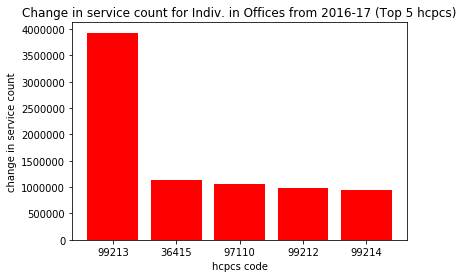

In [189]:
plt.bar(phys_srvc_io_1617['hcpcs_code'], phys_srvc_io_1617['16/17_srvc_chng'], color='red')
plt.xlabel('hcpcs code')
plt.ylabel('change in service count')
plt.title('Change in service count for Indiv. in Offices from 2016-17 (Top 5 hcpcs)')
plt.show()

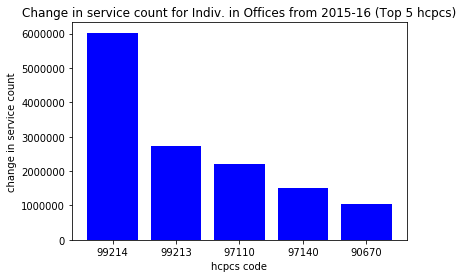

In [190]:
plt.bar(phys_srvc_io_1516['hcpcs_code'], phys_srvc_io_1516['15/16_srvc_chng'], color='blue')
plt.xlabel('hcpcs code')
plt.ylabel('change in service count')
plt.title('Change in service count for Indiv. in Offices from 2015-16 (Top 5 hcpcs)')
plt.show()

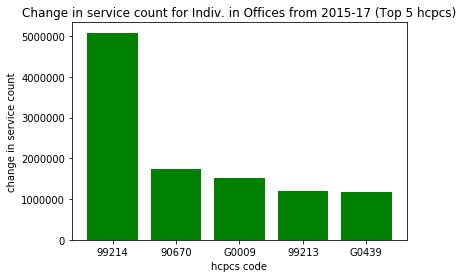

In [191]:
plt.bar(phys_srvc_io_1517['hcpcs_code'], phys_srvc_io_1517['15/17_srvc_chng'], color='green')
plt.xlabel('hcpcs code')
plt.ylabel('change in service count')
plt.title('Change in service count for Indiv. in Offices from 2015-17 (Top 5 hcpcs)')
plt.show()

In [171]:
print(phys_srvc_if_1617)
print(phys_srvc_if_1516)
print(phys_srvc_if_1517)

     hcpcs_code  srvc_cnt_17  srvc_cnt_16  16/17_srvc_chng
2946      99232   39510956.0   42320734.0        2809778.0
2947      99233   18404797.0   19225307.0         820510.0
2945      99231    5250182.0    5951748.0         701566.0
2054      71010   14378326.0   14990924.0         612598.0
2654      93010   14968895.0   15536949.0         568054.0
     hcpcs_code  srvc_cnt_16  srvc_cnt_15  15/16_srvc_chng
2947      99233   19225307.0   18642832.0         582475.0
2654      93010   15536949.0   15080844.0         456105.0
2100      72170     412229.0     781805.0         369576.0
2957      99285   10852400.0   10548413.0         303987.0
2946      99232   42320734.0   42050908.0         269826.0
     hcpcs_code  srvc_cnt_17  srvc_cnt_15  15/17_srvc_chng
2946      99232   39510956.0   42050908.0        2539952.0
2945      99231    5250182.0    6036295.0         786113.0
2056      71020    7270772.0    7900631.0         629859.0
2054      71010   14378326.0   14890614.0         512288

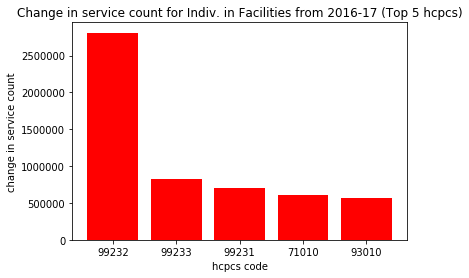

In [192]:
plt.bar(phys_srvc_if_1617['hcpcs_code'], phys_srvc_if_1617['16/17_srvc_chng'], color='red')
plt.xlabel('hcpcs code')
plt.ylabel('change in service count')
plt.title('Change in service count for Indiv. in Facilities from 2016-17 (Top 5 hcpcs)')
plt.show()

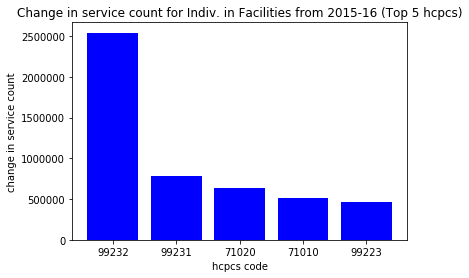

In [193]:
plt.bar(phys_srvc_if_1517['hcpcs_code'], phys_srvc_if_1517['15/17_srvc_chng'], color='blue')
plt.xlabel('hcpcs code')
plt.ylabel('change in service count')
plt.title('Change in service count for Indiv. in Facilities from 2015-16 (Top 5 hcpcs)')
plt.show()

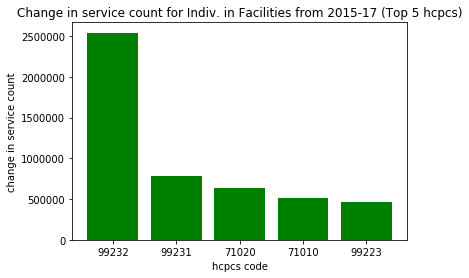

In [194]:
plt.bar(phys_srvc_if_1517['hcpcs_code'], phys_srvc_if_1517['15/17_srvc_chng'], color='green')
plt.xlabel('hcpcs code')
plt.ylabel('change in service count')
plt.title('Change in service count for Indiv. in Facilities from 2015-17 (Top 5 hcpcs)')
plt.show()

In [172]:
print(phys_srvc_oo_1617)
print(phys_srvc_oo_1516)
print(phys_srvc_oo_1517)

     hcpcs_code  srvc_cnt_17  srvc_cnt_16  16/17_srvc_chng
0         0159T        482.0        524.0       -1426320.0
994       87143        247.0        241.0       -1426320.0
1003      87176       1662.0       1817.0       -1426320.0
1002      87169        508.0        520.0       -1426320.0
1001      87168       1515.0       1151.0       -1426320.0
     hcpcs_code  srvc_cnt_16  srvc_cnt_15  15/16_srvc_chng
0         0159T        524.0        452.0        5168240.0
994       87143        241.0        220.0        5168240.0
1003      87176       1817.0       1452.0        5168240.0
1002      87169        520.0        522.0        5168240.0
1001      87168       1151.0       1409.0        5168240.0
     hcpcs_code  srvc_cnt_17  srvc_cnt_15  15/17_srvc_chng
0         0159T        482.0        452.0        3741920.0
994       87143        247.0        220.0        3741920.0
1003      87176       1662.0       1452.0        3741920.0
1002      87169        508.0        522.0        3741920

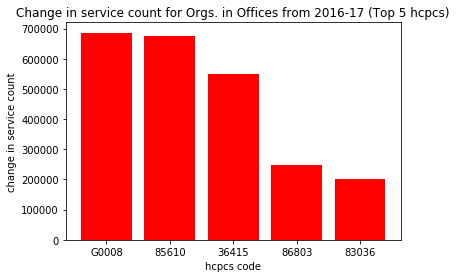

In [202]:
plt.bar(phys_srvc_oo_1617['hcpcs_code'], phys_srvc_oo_1617['16/17_srvc_chng'], color='red')
plt.xlabel('hcpcs code')
plt.ylabel('change in service count')
plt.title('Change in service count for Orgs. in Offices from 2016-17 (Top 5 hcpcs)')
plt.show()

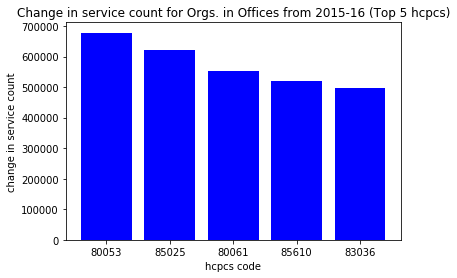

In [203]:
plt.bar(phys_srvc_oo_1516['hcpcs_code'], phys_srvc_oo_1516['15/16_srvc_chng'], color='blue')
plt.xlabel('hcpcs code')
plt.ylabel('change in service count')
plt.title('Change in service count for Orgs. in Offices from 2015-16 (Top 5 hcpcs)')
plt.show()

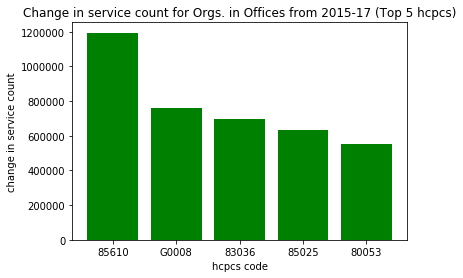

In [205]:
plt.bar(phys_srvc_oo_1517['hcpcs_code'], phys_srvc_oo_1517['15/17_srvc_chng'], color='green')
plt.xlabel('hcpcs code')
plt.ylabel('change in service count')
plt.title('Change in service count for Orgs. in Offices from 2015-17 (Top 5 hcpcs)')
plt.show()

In [173]:
print(phys_srvc_of_1617)
print(phys_srvc_of_1516)
print(phys_srvc_of_1517)

    hcpcs_code  srvc_cnt_17  srvc_cnt_16  16/17_srvc_chng
949      A0428    3719644.0    3830536.0         110892.0
946      A0425   11799504.0   11879449.0          79945.0
836      85610      30861.0      94170.0          63309.0
648      71010     138731.0     182091.0          43360.0
734      80048       3864.0      43644.0          39780.0
    hcpcs_code  srvc_cnt_16  srvc_cnt_15  15/16_srvc_chng
977      G0471    2299166.0    2202687.0          96479.0
949      A0428    3830536.0    3918812.0          88276.0
950      A0429    2890826.0    2803009.0          87817.0
946      A0425   11879449.0   11816245.0          63204.0
548      66984    1215476.0    1157046.0          58430.0
    hcpcs_code  srvc_cnt_17  srvc_cnt_15  15/17_srvc_chng
949      A0428    3719644.0    3918812.0         199168.0
977      G0471    2325314.0    2202687.0         122627.0
836      85610      30861.0     144353.0         113492.0
948      A0427    4902347.0    4821553.0          80794.0
648      71010

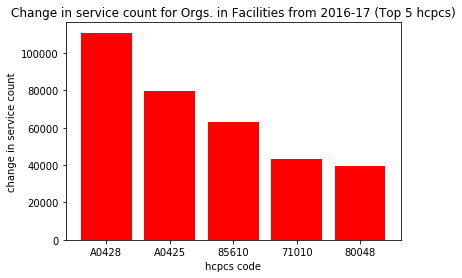

In [206]:
plt.bar(phys_srvc_of_1617['hcpcs_code'], phys_srvc_of_1617['16/17_srvc_chng'], color='red')
plt.xlabel('hcpcs code')
plt.ylabel('change in service count')
plt.title('Change in service count for Orgs. in Facilities from 2016-17 (Top 5 hcpcs)')
plt.show()

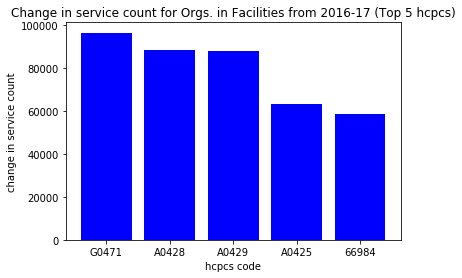

In [207]:
plt.bar(phys_srvc_of_1516['hcpcs_code'], phys_srvc_of_1516['15/16_srvc_chng'], color='blue')
plt.xlabel('hcpcs code')
plt.ylabel('change in service count')
plt.title('Change in service count for Orgs. in Facilities from 2016-17 (Top 5 hcpcs)')
plt.show()

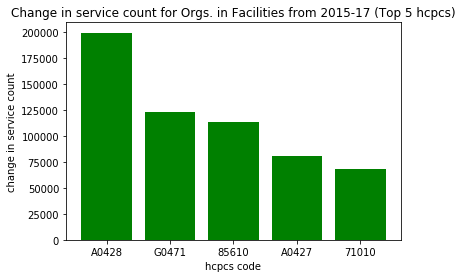

In [208]:
plt.bar(phys_srvc_of_1517['hcpcs_code'], phys_srvc_of_1517['15/17_srvc_chng'], color='green')
plt.xlabel('hcpcs code')
plt.ylabel('change in service count')
plt.title('Change in service count for Orgs. in Facilities from 2015-17 (Top 5 hcpcs)')
plt.show()

phys_srvc_io_1617.to_csv('srvc_indv_off_1617.csv')

phys_srvc_io_1516.to_csv('srvc_indv_off_1516.csv')

phys_srvc_io_1517.to_csv('srvc_indv_off_1517.csv')

phys_srvc_if_1617.to_csv('srvc_indv_fac_1617.csv')

phys_srvc_if_1516.to_csv('srvc_indv_fac_1516.csv')

phys_srvc_if_1517.to_csv('srvc_indv_fac_1517.csv')

phys_srvc_oo_1617.to_csv('srvc_org_off_1617.csv')

phys_srvc_oo_1516.to_csv('srvc_org_off_1516.csv')

phys_srvc_oo_1517.to_csv('srvc_org_off_1517.csv')

phys_srvc_of_1617.to_csv('srvc_org_fac_1617.csv')

phys_srvc_of_1516.to_csv('srvc_org_fac_1516.csv')

phys_srvc_of_1517.to_csv('srvc_org_fac_1517.csv')